### Sumeet Shivgand
### R00182850
### Assignment 2

In [1]:
# Data Wrangling 
import numpy as np
import pandas as pd 
import random

# Data Visualisation 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning 
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# Resampling data with under sampling, over sampling and SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
random.seed(850)
# Read the file into dataframe
credit_df = pd.read_csv('D:\\CIT\\Semester 2\\Applied Machine Learning\\Assignment 2\\Project\\credit1.csv')
credit_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.256229,-0.506944,0.482418,0.115658,-1.022264,-0.522547,-0.415670,-0.057159,-0.912658,0.796623,...,-0.444295,-0.703718,0.020491,0.550057,0.403226,0.337180,-0.012798,0.008154,28.00,0
1,0.944330,-1.830559,-0.311509,-1.230706,-1.105964,0.059692,-0.437650,-0.136275,-2.245879,1.356977,...,0.024525,0.025444,-0.360068,-0.243700,0.554992,-0.064089,-0.015910,0.041902,285.27,0
2,1.246314,0.366946,0.297959,1.118263,-0.272567,-0.969192,0.215065,-0.231450,-0.012874,0.016361,...,0.026556,0.125002,-0.097595,0.397102,0.686940,-0.328230,0.013752,0.020123,3.30,0
3,-1.152825,0.462867,0.995502,0.703443,0.409895,-0.448310,-0.298842,0.644459,-1.026941,-0.520884,...,0.010666,-0.359297,0.072184,-0.014728,-0.703373,0.173465,0.024653,-0.034414,0.89,0
4,1.151825,0.315842,0.513422,1.152740,-0.262601,-0.607620,0.127761,-0.138176,-0.099944,-0.063739,...,0.136174,0.497671,-0.061487,0.428082,0.587320,-0.290667,0.040006,0.025360,14.90,0


(56962, 30)
0    0.998209
1    0.001791
Name: Class, dtype: float64


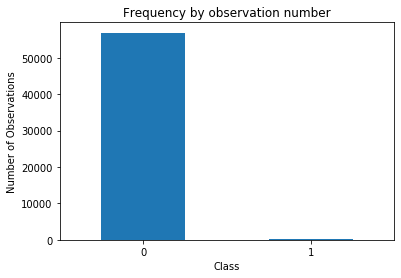

In [3]:
print(credit_df.shape)
#credit_df.info()
#print(credit_df.describe())
fnf = credit_df["Class"].value_counts()
print(fnf/len(credit_df))

# Plottingg your data
plt.xlabel("Class")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

#Dataset Summary:
#We have 56962 entries within 29 features and 1 target (Class).
#There are no "Null" values, so there is no need to replace any values.
#The mean of all the amounts made is relatively small, approximately 88 USD.
#Most of the transactions were Non-Fraud (99.82%) of the time, 
#while Fraud transactions occurs (0.18%) of the time in the dataframe.

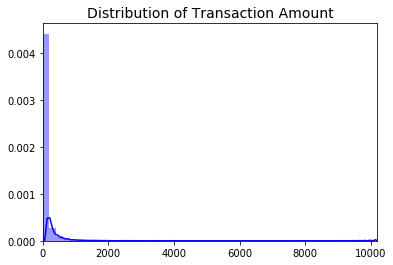

In [4]:
# Distribution of Amount feature

import seaborn as sns

fig, ax = plt.subplots()

# Plot the distribution of 'Amount' feature 
sns.distplot(credit_df['Amount'].values, ax=ax, color='b')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(credit_df['Amount'].values), max(credit_df['Amount'].values)])

plt.show()

#Summary:
#Mean of transaction amount is 88 USD and 75% quatile is 77 USD.
#We should better scale these two skewed features also.

In [5]:
# Seperate total data into non-fraud and fraud cases
#save non-fraud df observations into a separate df
nonfraud_df = credit_df[credit_df.Class == 0] 

#do the same for frauds
fraud_df = credit_df[credit_df.Class == 1] 

In [6]:
print(nonfraud_df.shape)
print(fraud_df.shape)

(56860, 30)
(102, 30)


C:\Users\shivgandsumeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\shivgandsumeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


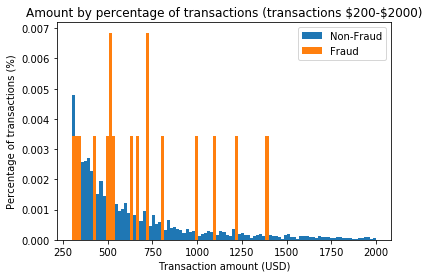

In [7]:
# Transaction Amount Visualization
# Plot of high value transactions($300-$2000)
bins = np.linspace(300, 2000, 100)
plt.hist(nonfraud_df.Amount, bins, alpha=1, normed=True, label='Non-Fraud')
plt.hist(fraud_df.Amount, bins, alpha=1, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

#Summary:
# Here, long tail means fraud transaction happened more frequently.
# So, it would be hard to differentiate fraud from normal transactions by transaction amount.

In [8]:
#Feature Scaling
# Here, features V1-V28 have been transformed by PCA and scaled already whereas feature "Amount" had not.
# So, we will analyze the 'Amount' features with other V1-V28, and they should be scaled properly before we train our 
# model using various algorithms

#Which scaling mehtod should we use?
#The Standard Scaler is not recommended as "Amount" features are not normally distributed.
#The Min-Max Scaler is also not recommended as there are noticeable outliers in feature "Amount".
#The Robust Scaler are robust to outliers: (xi–Q1(x))/( Q3(x)–Q1(x)) (Q1 and Q3 represent 25% and 75% quartiles).
#So we choose Robust Scaler to scale these two features.


# Scale "Amount" Feature
from sklearn.preprocessing import StandardScaler, RobustScaler
credit_df['scaled_amount'] = RobustScaler().fit_transform(credit_df['Amount'].values.reshape(-1,1))

# Make a new dataset named "scaled_df" dropping out original "Amount"
scaled_df = credit_df.drop(['Amount'],axis = 1,inplace=False)
scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,1.256229,-0.506944,0.482418,0.115658,-1.022264,-0.522547,-0.415670,-0.057159,-0.912658,0.796623,...,-0.444295,-0.703718,0.020491,0.550057,0.403226,0.337180,-0.012798,0.008154,0,0.083836
1,0.944330,-1.830559,-0.311509,-1.230706,-1.105964,0.059692,-0.437650,-0.136275,-2.245879,1.356977,...,0.024525,0.025444,-0.360068,-0.243700,0.554992,-0.064089,-0.015910,0.041902,0,3.672607
2,1.246314,0.366946,0.297959,1.118263,-0.272567,-0.969192,0.215065,-0.231450,-0.012874,0.016361,...,0.026556,0.125002,-0.097595,0.397102,0.686940,-0.328230,0.013752,0.020123,0,-0.260715
3,-1.152825,0.462867,0.995502,0.703443,0.409895,-0.448310,-0.298842,0.644459,-1.026941,-0.520884,...,0.010666,-0.359297,0.072184,-0.014728,-0.703373,0.173465,0.024653,-0.034414,0,-0.294333
4,1.151825,0.315842,0.513422,1.152740,-0.262601,-0.607620,0.127761,-0.138176,-0.099944,-0.063739,...,0.136174,0.497671,-0.061487,0.428082,0.587320,-0.290667,0.040006,0.025360,0,-0.098901


In [9]:
# Define the preprocess_data function to extract the features 
def preprocess_data(df):
    X = credit_df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = credit_df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the preprocess_data function 
X, y = preprocess_data(scaled_df)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (39873, 30)
Number transactions y_train dataset:  (39873, 1)
Number transactions X_test dataset:  (17089, 30)
Number transactions y_test dataset:  (17089, 1)


In [11]:
# Using SMOTE Alogrithm

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

# We see that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class.
# Both categories have equal amount of records. More specifically, the minority class has been increased 
# to the total number of majority class.
# Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

Before OverSampling, counts of label '1': [68]
Before OverSampling, counts of label '0': [39805] 

After OverSampling, the shape of train_X: (79610, 30)
After OverSampling, the shape of train_y: (79610,) 

After OverSampling, counts of label '1': 39805
After OverSampling, counts of label '0': 39805


In [12]:
# Decision tree with smote 
dtc1 = DecisionTreeClassifier() 
dtc1.fit(X_train_res, y_train_res.ravel()) 
pred_dtc1 = dtc1.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_dtc1)) 
print(classification_report(y_test, pred_dtc1)) 

# Here, we have the accuracy of 99% but the precision and recall value is less 
# This is not a good model.

0.9977178301831587
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.45      0.62      0.52        34

    accuracy                           1.00     17089
   macro avg       0.72      0.81      0.76     17089
weighted avg       1.00      1.00      1.00     17089



In [13]:
# Random Forest with smote 

rfc1 = RandomForestClassifier()
rfc1.fit(X_train_res, y_train_res.ravel()) 
pred_rfc1 = rfc1.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_rfc1)) 
print(classification_report(y_test, pred_rfc1)) 


0.9989466908537655
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.77      0.68      0.72        34

    accuracy                           1.00     17089
   macro avg       0.88      0.84      0.86     17089
weighted avg       1.00      1.00      1.00     17089



In [14]:
# XGBoost with smote 

xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train_res, y_train_res.ravel()) 
pred_xgb1 = xgb1.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_xgb1)) 
print(classification_report(y_test, pred_xgb1)) 


0.9990637252033472
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.78      0.74      0.76        34

    accuracy                           1.00     17089
   macro avg       0.89      0.87      0.88     17089
weighted avg       1.00      1.00      1.00     17089



In [15]:
# Using RandomOverSampling Alogrithm
#from imblearn.over_sampling import RandomOverSampler
print("Before RandomOverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before RandomOverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
oversam = RandomOverSampler(random_state=0)
X_oversam, y_oversam = oversam.fit_sample(X_train,y_train.ravel())
  
print('After RandomOverSampling, the shape of train_X: {}'.format(X_oversam.shape)) 
print('After RandomOverSampling, the shape of train_y: {} \n'.format(y_oversam.shape)) 
  
print("After RandomOverSampling, counts of label '1': {}".format(sum(y_oversam == 1))) 
print("After RandomOverSampling, counts of label '0': {}".format(sum(y_oversam == 0))) 

Before RandomOverSampling, counts of label '1': [68]
Before RandomOverSampling, counts of label '0': [39805] 

After RandomOverSampling, the shape of train_X: (79610, 30)
After RandomOverSampling, the shape of train_y: (79610,) 

After RandomOverSampling, counts of label '1': 39805
After RandomOverSampling, counts of label '0': 39805


In [16]:
# Decision tree with Random Over Sampling 
dtc2 = DecisionTreeClassifier() 
dtc2.fit(X_oversam, y_oversam.ravel()) 
pred_dtc2 = dtc2.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_dtc2)) 
print(classification_report(y_test, pred_dtc2)) 


0.9987711393293932
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.74      0.59      0.66        34

    accuracy                           1.00     17089
   macro avg       0.87      0.79      0.83     17089
weighted avg       1.00      1.00      1.00     17089



In [17]:
# Random Forest with Random Over Sampling

rfc2 = RandomForestClassifier()
rfc2.fit(X_oversam, y_oversam.ravel()) 
pred_rfc2 = rfc2.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_rfc2)) 
print(classification_report(y_test, pred_rfc2)) 


0.9992977939025104
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.96      0.68      0.79        34

    accuracy                           1.00     17089
   macro avg       0.98      0.84      0.90     17089
weighted avg       1.00      1.00      1.00     17089



In [18]:
# XGBoost with Random Over Sampling 

xgb2 = xgb.XGBClassifier()
xgb2.fit(X_oversam, y_oversam.ravel()) 
pred_xgb2 = xgb2.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_xgb2)) 
print(classification_report(y_test, pred_xgb2)) 


0.9992392767277196
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17055
         1.0       0.92      0.68      0.78        34

    accuracy                           1.00     17089
   macro avg       0.96      0.84      0.89     17089
weighted avg       1.00      1.00      1.00     17089



In [19]:
# Using RandomUnderSampling Alogrithm
#from imblearn.over_sampling import RandomOverSampler
print("Before RandomUnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before RandomUnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
from imblearn.over_sampling import SMOTE
undersam = RandomUnderSampler(random_state=0)
X_undersam, y_undersam = undersam.fit_sample(X_train,y_train.ravel())
  
print('After RandomUnderSampling, the shape of train_X: {}'.format(X_undersam.shape)) 
print('After RandomUnderSampling, the shape of train_y: {} \n'.format(y_undersam.shape)) 
  
print("After RandomUnderSampling, counts of label '1': {}".format(sum(y_undersam == 1))) 
print("After RandomUnderSampling, counts of label '0': {}".format(sum(y_undersam == 0))) 

Before RandomUnderSampling, counts of label '1': [68]
Before RandomUnderSampling, counts of label '0': [39805] 

After RandomUnderSampling, the shape of train_X: (136, 30)
After RandomUnderSampling, the shape of train_y: (136,) 

After RandomUnderSampling, counts of label '1': 68
After RandomUnderSampling, counts of label '0': 68


In [20]:
# Decision tree with Random Under Sampling 
dtc3 = DecisionTreeClassifier() 
dtc3.fit(X_undersam, y_undersam.ravel()) 
pred_dtc3 = dtc3.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_dtc3)) 
print(classification_report(y_test, pred_dtc3)) 


0.8990578734858681
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     17055
         1.0       0.02      0.85      0.03        34

    accuracy                           0.90     17089
   macro avg       0.51      0.88      0.49     17089
weighted avg       1.00      0.90      0.94     17089



In [21]:
# Random Forest with Random Under Sampling 

rfc3 = RandomForestClassifier()
rfc3.fit(X_undersam, y_undersam.ravel()) 
pred_rfc3 = rfc3.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_rfc3)) 
print(classification_report(y_test, pred_rfc3)) 


0.9674059336415238
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     17055
         1.0       0.05      0.79      0.09        34

    accuracy                           0.97     17089
   macro avg       0.52      0.88      0.54     17089
weighted avg       1.00      0.97      0.98     17089



In [22]:
# XGBoost with Random Under Sampling

xgb3 = xgb.XGBClassifier()
xgb3.fit(X_undersam, y_undersam.ravel()) 
pred_xgb3 = xgb3.predict(X_test) 
  
# print classification report
print(accuracy_score(y_test, pred_xgb3)) 
print(classification_report(y_test, pred_xgb3)) 

# We have reduced the accuracy to 98% as compared to previous model 
# but the recall value of minority class has also improved to 62 %. 
# This is a good model compared to the previous one. Recall is great.

0.9588624261220668
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     17055
         1.0       0.04      0.79      0.07        34

    accuracy                           0.96     17089
   macro avg       0.52      0.88      0.53     17089
weighted avg       1.00      0.96      0.98     17089



In [23]:
# Hyper-parameter tuning on best mode. i.e. XGBoost with oversampling
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15]
    
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb2, param_grid = params, cv = 2, n_jobs = -1)
grid.fit(X_oversam, y_oversam)
# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
print("Best Score: {}".format(grid.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.3, 'max_depth': 3}
Best Score: 0.9998869488757693
